In [8]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [70]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [71]:
# Shape of the numpy arrays

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


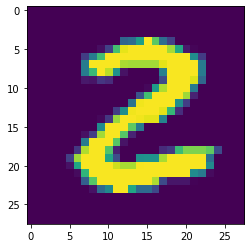

In [72]:
# Displaying the image

plt.imshow(X_train[25])
plt.show()

In [73]:
# print the corresponding label

print(Y_train[25])

2


In [74]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [75]:
# Unique values in Y_train

print(np.unique(Y_train))

# Unique values in Y_test

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [76]:
# Scaling the values

X_train = X_train/255
X_test = X_test/255

In [77]:
# Setting up the layers of the Neural  Network

model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),  
            keras.layers.Dense(50, activation='relu'), 
            keras.layers.Dense(50, activation='relu'), 
            keras.layers.Dense(10, activation='sigmoid')])

In [78]:
# Compiling the Neural Network
model.compile(optimizer='adam', 
                         loss = 'sparse_categorical_crossentropy', 
                         metrics=['accuracy'])

In [79]:
# Training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0835 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0685 - accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0609 - accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0513 - accuracy: 0.9838
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0458 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0402 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.034

In [80]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1040 - accuracy: 0.9710
0.9710000157356262


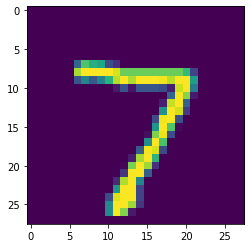

In [81]:
# First data point in X_test

plt.imshow(X_test[0])
plt.show()

In [82]:
print(Y_test[0])

7


In [83]:
Y_pred_labels = model.predict(X_test)
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

1


In [84]:
print(Y_pred_labels)

[[3.5130084e-03 6.7106444e-01 6.6638464e-01 ... 9.9999774e-01
  1.3417095e-02 6.5949798e-02]
 [1.4623702e-03 9.8551810e-01 9.9999803e-01 ... 8.7179070e-10
  9.9594283e-01 2.8698874e-09]
 [3.2803416e-04 9.9889880e-01 1.9822419e-02 ... 1.7416507e-02
  8.2349467e-01 3.1207800e-03]
 ...
 [7.6076623e-07 2.1074546e-05 1.1165320e-04 ... 5.3507298e-02
  2.6697814e-03 5.0617886e-01]
 [3.9582705e-05 3.1402707e-04 3.5408437e-03 ... 6.9005787e-03
  9.9133873e-01 6.4516068e-04]
 [1.0095924e-02 1.2965620e-02 4.6259880e-02 ... 3.3845839e-07
  1.4659762e-04 5.2905436e-10]]


Path of the image to be predicted: /Jishan2.jpg


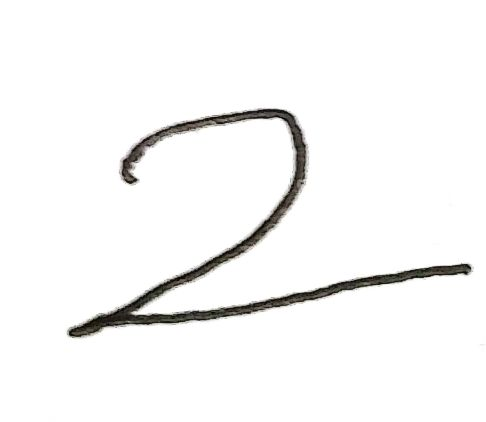

The Handwritten Digit is recognised as  2


In [99]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognised as ', input_pred_label)

In [ ]:
_